<a href="https://colab.research.google.com/github/zahrafahira1324/AI-CREATOR-LVL-3/blob/main/Mengeksplorasi_Aplikasi_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Langkah 1: Impor Library yang Diperlukan**
Di sini, kita mengimpor **TensorFlow** untuk operasi deep learning, **Keras** untuk membangun jaringan saraf, **NumPy** untuk operasi numerik, dan **Matplotlib** untuk membuat visualisasi.

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# **Langkah 2: Memuat dan Mempraproses Dataset CIFAR-10**

Dataset CIFAR-10 berisi 60.000 gambar berwarna berukuran 32x32 piksel, terbagi ke dalam 10 kelas, masing-masing dengan 6.000 gambar. Dataset ini bisa langsung diakses dari **TensorFlow**.

In [3]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Normalize the images to be between 0 and 1 by dividing by 255
x_train, x_test = x_train / 255.0, x_test / 255.0
# Display the shape of the Kumpulan Data
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)




*   x_train dan x_test adalah data gambar.
*   y_train dan y_test adalah label dari gambar.
*  Nilai piksel dinormalisasi dengan membagi 255 agar berbeda pada skala 0-1



# **Langkah 3: Membangun Model CNN**

Di langkah ini, kita akan membangun model CNN sederhana dengan beberapa lapisan:


*   **Conv2D**: untuk operasi konvolusi
*   **MaxPooling2D**: untuk menyusutkan dimensi gambar
*   **Flatten**: untuk mengubah data 2D menjadi vektor 1D
*   **Dense**: lapisn terhubung penuh untuk klasifikasi



In [5]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
# Summarize the model architecture
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

**Penjelasan Lapisan**

• Lapisan Conv2D pertama menerapkan 32 filter berukuran 3x3 pada gambar input, diikuti oleh MaxPooling2D untuk mengurangi dimensi spasial.

• Kita menggunakan lapisan Conv2D tambahan dengan 64 filter, diikuti
dengan pooling, untuk mengekstraksi fitur yang lebih kompleks.

• Flatten mengubah matriks 2D menjadi vektor 1D untuk digunakan pada lapisan fully connected.

• Lapisan Dense terakhir memiliki 10 unit, yang sesuai dengan 10 kelas dalam dataset CIFAR-10 (misalnya: pesawat, kucing, anjing, dll.).

# **Langkah 4: Kompilasi Model**

Sekarang, kita akan mengompilasi model. Model memerlukan loss function(fungsi kerugian), optimizer (pengoptimal), dan metrics (metrik) untuk melacak
performanya.

In [7]:
# Compile the model
model.compile(optimizer='adam',
loss=tf.keras.losses.
SparseCategoricalCrossentropy(from_logits=False),
metrics=['accuracy'])

• **Adam optimizer** sering digunakan untuk CNN karena efisien dan bekerja baik pada berbagai jenis data.

• **Sparse Categorical Crossentropy** digunakan sebagai fungsi kerugian
karena kita memiliki banyak kelas (multiclass classification).

• Kita melacak **accuracy** sebagai metrik untuk mengukur seberapa baik model mengenali data.

# **Langkah 5: Melatih Model**
Sekarang, kita akan melatih model menggunakan data pelatihan CIFAR-10 selama beberapa epoch. Kita juga akan menyertakan data validasi untukmemantau performa model selama proses pelatihan.

In [8]:
# Train the model
history = model.fit(x_train, y_train, epochs=10,
validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 46ms/step - accuracy: 0.3525 - loss: 1.7548 - val_accuracy: 0.5528 - val_loss: 1.2560
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 43ms/step - accuracy: 0.5813 - loss: 1.1858 - val_accuracy: 0.6356 - val_loss: 1.0362
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.6440 - loss: 1.0127 - val_accuracy: 0.6699 - val_loss: 0.9563
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.6891 - loss: 0.8952 - val_accuracy: 0.6848 - val_loss: 0.9115
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.7149 - loss: 0.8147 - val_accuracy: 0.6695 - val_loss: 0.9521
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.7348 - loss: 0.7614 - val_accuracy: 0.6859 - val_loss: 0.9216
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.7484 - loss: 0.7129 - val_accuracy: 0.7002 - val_loss: 0.8785
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.7707 -

Pada bagian ini, model akan dilatih selama 10 epoch, dan kita menyertakan **data test** sebagai data validasi untuk mengevaluasi performa model setelah setiap
epoch.

# **Langkah 6: Mengevaluasi Model**
Setelah model selesai dilatih, Anda dapat mengevaluasi performanya pada data test.

Kode ini akan memberikan akurasi akhir model pada data test, yang menunjukkan
seberapa baik model dapat mengeneralisasi terhadap data yang belum pernah
dilihat sebelumnya.

In [11]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test,
verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 4s - 13ms/step - accuracy: 0.7070 - loss: 0.8928
Test accuracy: 0.7070000171661377


# **Langkah 7: Visualisasi Riwayat Pelatihan**
Untuk memahami seberapa baik model belajar seiring waktu, Anda dapat memvisualisasikan kurva akurasi dan loss selama pelatihan.

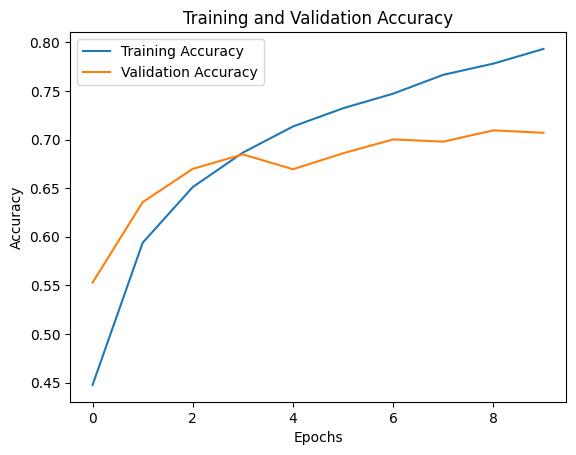

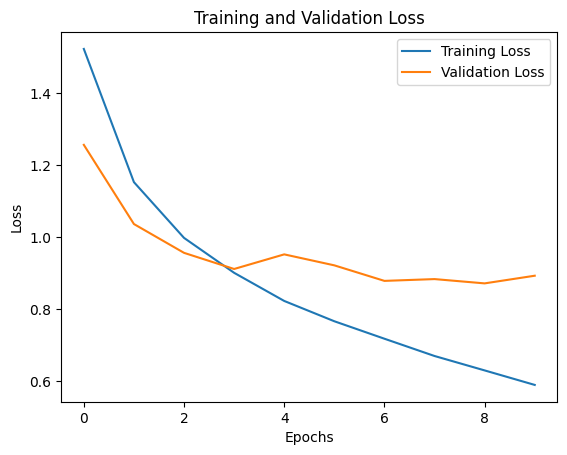

In [12]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'],
label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'],
label='Validation Loss')


plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

Visualisasi ini akan menampilkan kurva akurasi dan loss, membantu Anda mengetahui apakah model mengalami overfitting (terlalu menyesuaikan diri dengan data pelatihan) atau underfitting (tidak belajar cukup baik dari data).

# **Langkah 8: Membuat Prediksi**
Akhirnya, Anda dapat menggunakan model yang telah dilatih untuk membuat prediksi pada gambar baru.

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
Predicted label for the first image: 3


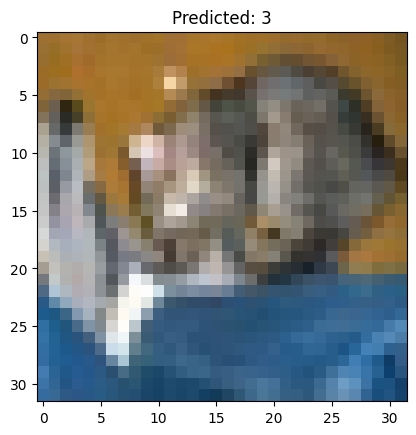

In [14]:
# Make predictions on the test data
predictions = model.predict(x_test)
# Show the predicted class for the first image
print("Predicted label for the first image:",
np.argmax(predictions[0]))
# Display the image
plt.imshow(x_test[0])
plt.title(f"Predicted: {np.argmax(predictions[0])}")
plt.show()

**np.argmax(predictions[0])** mengembalikan kelas dengan
probabilitas tertinggi untuk gambar pertama dalam test set.